📌 Project Goal

Predict whether a customer will convert (buy / enroll / subscribe) based on their behavior & details.

## import Lib

In [1]:
import numpy as np 
import pandas as pd 

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,classification_report,recall_score,confusion_matrix

## Dataset

In [4]:
data=pd.read_csv("customer_conversion_traing_dataset .csv")

In [5]:
data.shape

(100000, 19)

In [6]:
data.head()

,LeadID,Age,Gender,Location,LeadSource,TimeSpent (minutes),PagesViewed,LeadStatus,EmailSent,DeviceType,ReferralSource,FormSubmissions,Downloads,CTR_ProductPage,ResponseTime (hours),FollowUpEmails,SocialMediaEngagement,PaymentHistory,Conversion (Target)
0,1,60,Female,Faisalabad,Referral,30,13,Warm,1,Desktop,Google,4,0,0.3,7,10,195,No Payment,0
1,2,27,Female,Islamabad,Referral,28,4,Hot,7,Desktop,Direct,2,2,0.3,13,3,103,No Payment,0
2,3,21,Female,Rawalpindi,Referral,45,10,Warm,9,Tablet,Direct,4,2,0.6,10,8,33,No Payment,0
3,4,37,Female,Faisalabad,Email,45,15,Warm,5,Desktop,ReferralSite,1,3,0.3,11,1,189,Good,0
4,5,35,Male,Karachi,Referral,31,11,Cold,2,Tablet,Google,4,3,0.5,9,2,83,No Payment,0


## check a output Balance or imblance 

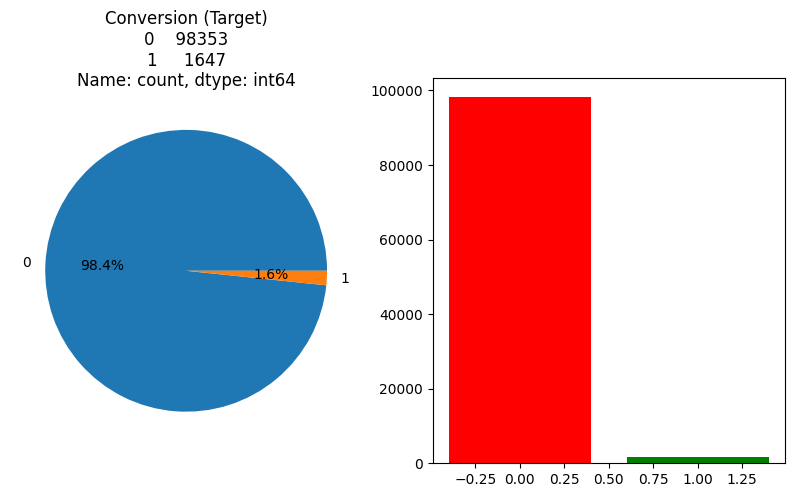

In [7]:
y=data['Conversion (Target)'].value_counts()
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.pie(y.values, labels=y.index.astype(str), autopct='%1.1f%%')
plt.title(f"{y}")

plt.subplot(1,2,2)
plt.bar(y.index,y.values,color=['red','green'])
plt.show()

## check categarical data for how much unique value and each data for how 

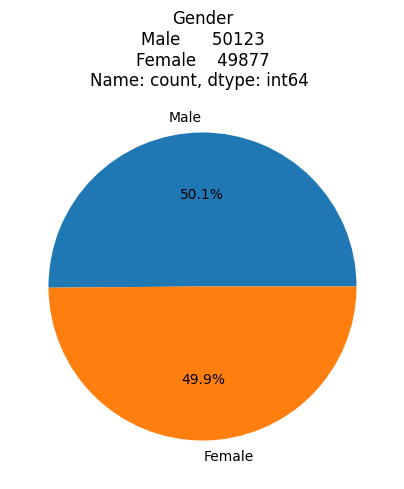

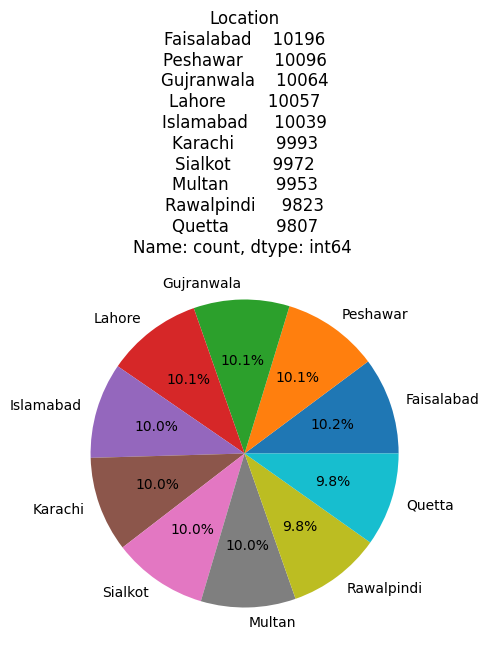

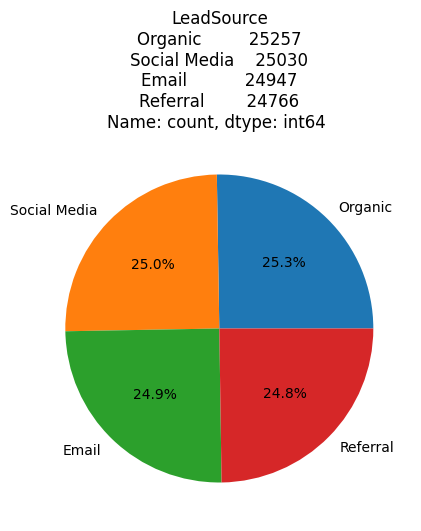

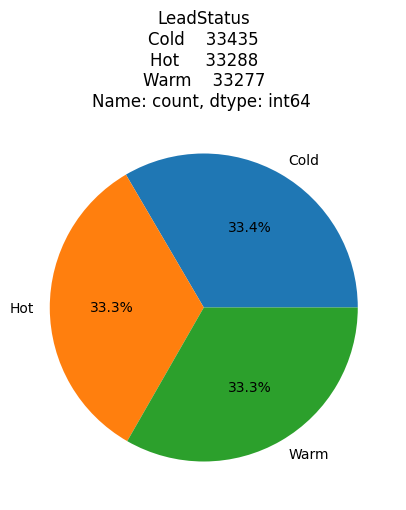

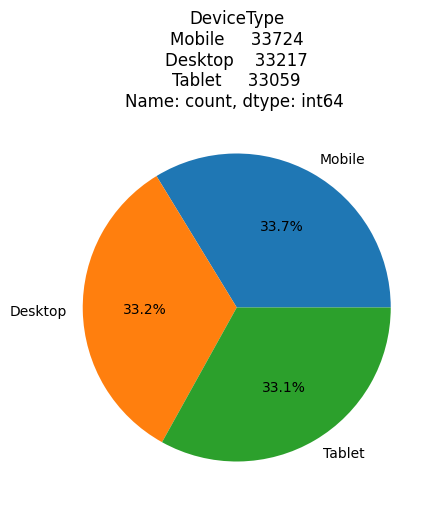

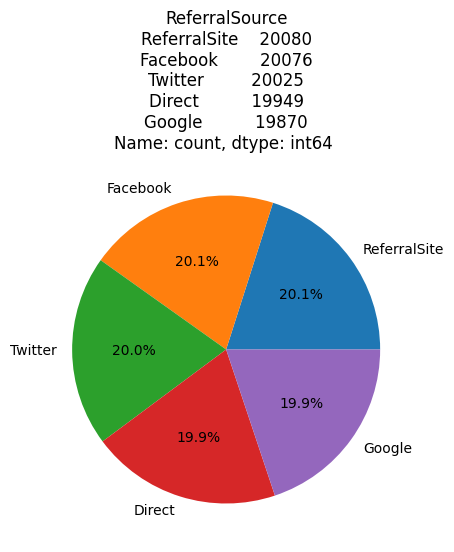

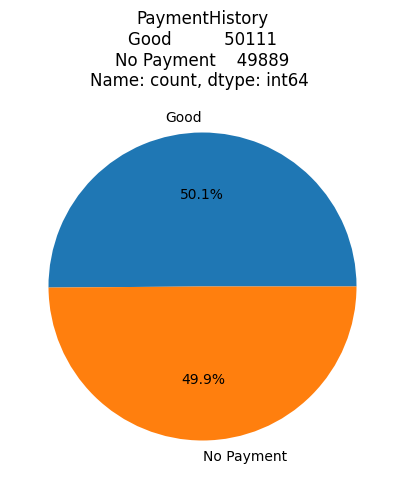

In [8]:


# Storing only categorical columns
cat_cols = data.select_dtypes(include=['object', 'category']).columns

for col in cat_cols:
    
    counts = data[col].value_counts()
    plt.figure(figsize=(5,5))
    counts = data[col].value_counts()
    plt.pie(counts.values, labels=counts.index.astype(str), autopct='%1.1f%%')
    plt.title(f"{counts} ")
    
    plt.show()


## check null value 

In [9]:
data.isnull().sum()

LeadID                   0
Age                      0
Gender                   0
Location                 0
LeadSource               0
TimeSpent (minutes)      0
PagesViewed              0
LeadStatus               0
EmailSent                0
DeviceType               0
ReferralSource           0
FormSubmissions          0
Downloads                0
CTR_ProductPage          0
ResponseTime (hours)     0
FollowUpEmails           0
SocialMediaEngagement    0
PaymentHistory           0
Conversion (Target)      0
dtype: int64

## check duplication

In [10]:
data[data.duplicated]

,LeadID,Age,Gender,Location,LeadSource,TimeSpent (minutes),PagesViewed,LeadStatus,EmailSent,DeviceType,ReferralSource,FormSubmissions,Downloads,CTR_ProductPage,ResponseTime (hours),FollowUpEmails,SocialMediaEngagement,PaymentHistory,Conversion (Target)


## information about dataset 

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   LeadID                 100000 non-null  int64  
 1   Age                    100000 non-null  int64  
 2   Gender                 100000 non-null  object 
 3   Location               100000 non-null  object 
 4   LeadSource             100000 non-null  object 
 5   TimeSpent (minutes)    100000 non-null  int64  
 6   PagesViewed            100000 non-null  int64  
 7   LeadStatus             100000 non-null  object 
 8   EmailSent              100000 non-null  int64  
 9   DeviceType             100000 non-null  object 
 10  ReferralSource         100000 non-null  object 
 11  FormSubmissions        100000 non-null  int64  
 12  Downloads              100000 non-null  int64  
 13  CTR_ProductPage        100000 non-null  float64
 14  ResponseTime (hours)   100000 non-nul

## check describe like mean,median,mode,max,min

In [12]:
data.describe()

,LeadID,Age,TimeSpent (minutes),PagesViewed,EmailSent,FormSubmissions,Downloads,CTR_ProductPage,ResponseTime (hours),FollowUpEmails,SocialMediaEngagement,Conversion (Target)
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,39.995810,32.529550,8.502020,5.001580,2.49979,1.498820,0.449336,12.514950,4.984590,110.106390,0.016470
std,28867.657797,11.854746,16.150348,4.029558,3.169473,1.70861,1.117484,0.206320,6.929558,3.166025,52.204422,0.127275
min,1.000000,20.000000,5.000000,2.000000,0.000000,0.00000,0.000000,0.100000,1.000000,0.000000,20.000000,0.000000
25%,25000.750000,30.000000,19.000000,5.000000,2.000000,1.00000,0.000000,0.300000,7.000000,2.000000,65.000000,0.000000
50%,50000.500000,40.000000,33.000000,8.000000,5.000000,3.00000,2.000000,0.400000,13.000000,5.000000,110.000000,0.000000
75%,75000.250000,50.000000,47.000000,12.000000,8.000000,4.00000,2.000000,0.600000,19.000000,8.000000,155.000000,0.000000
max,100000.000000,60.000000,60.000000,15.000000,10.000000,5.00000,3.000000,0.800000,24.000000,10.000000,200.000000,1.000000


# check a categary column for how much imp for output/lebal column

In [13]:
for col in (data.columns):
    if data[col].dtype=='object':
       mean_conv=data.groupby(col)['Conversion (Target)'].mean()
       print(f'\ncolumn:{col}')
       print(mean_conv)


column:Gender
Gender
Female    0.015959
Male      0.016978
Name: Conversion (Target), dtype: float64

column:Location
Location
Faisalabad    0.000000
Gujranwala    0.000000
Islamabad     0.055284
Karachi       0.054538
Lahore        0.054390
Multan        0.000000
Peshawar      0.000000
Quetta        0.000000
Rawalpindi    0.000000
Sialkot       0.000000
Name: Conversion (Target), dtype: float64

column:LeadSource
LeadSource
Email           0.017557
Organic         0.017104
Referral        0.015384
Social Media    0.015821
Name: Conversion (Target), dtype: float64

column:LeadStatus
LeadStatus
Cold    0.009840
Hot     0.029500
Warm    0.010097
Name: Conversion (Target), dtype: float64

column:DeviceType
DeviceType
Desktop    0.017371
Mobile     0.015301
Tablet     0.016758
Name: Conversion (Target), dtype: float64

column:ReferralSource
ReferralSource
Direct          0.016091
Facebook        0.016487
Google          0.016457
ReferralSite    0.016783
Twitter         0.016529
Name: Conv

## check corr for how much impact put on output /lebal 

<Axes: >

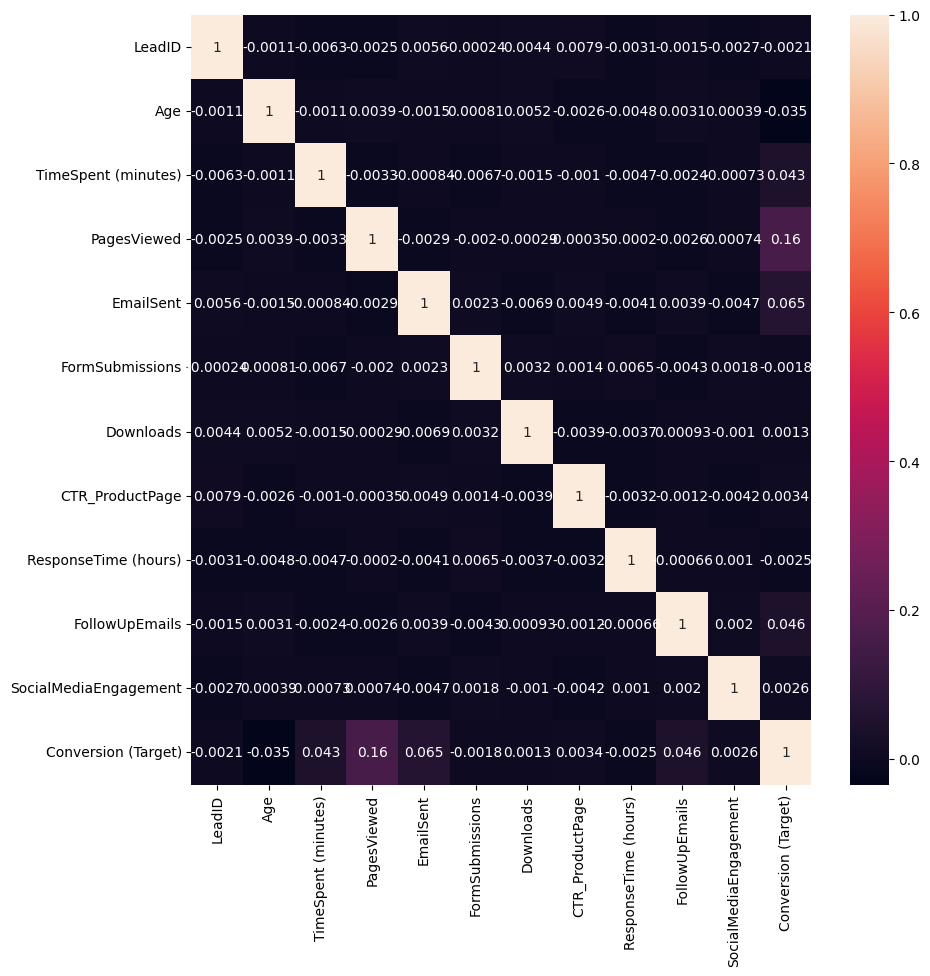

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(data.select_dtypes(include='number').corr(),annot=True)

In [15]:

data.drop(['LeadID','Age','Downloads','CTR_ProductPage','SocialMediaEngagement','Location'],axis=1,inplace=True)

In [16]:
data.head()

,Gender,LeadSource,TimeSpent (minutes),PagesViewed,LeadStatus,EmailSent,DeviceType,ReferralSource,FormSubmissions,ResponseTime (hours),FollowUpEmails,PaymentHistory,Conversion (Target)
0,Female,Referral,30,13,Warm,1,Desktop,Google,4,7,10,No Payment,0
1,Female,Referral,28,4,Hot,7,Desktop,Direct,2,13,3,No Payment,0
2,Female,Referral,45,10,Warm,9,Tablet,Direct,4,10,8,No Payment,0
3,Female,Email,45,15,Warm,5,Desktop,ReferralSite,1,11,1,Good,0
4,Male,Referral,31,11,Cold,2,Tablet,Google,4,9,2,No Payment,0


## check outlier and handle 

In [17]:
def outlier(data,col,c=0):
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.boxplot(data[col])
    plt.subplot(1,2,2)
    mean=data[col].mean()
    std=data[col].std()
    sns.histplot(data[col],kde=True)
    plt.axvline(mean,color='red',label='   Mean')
    plt.axvline(mean+3*std,color='Yellow',linestyle='--',label=' + STD ')
    plt.axvline(mean-3*std,color='Purple',linestyle='--',label='  - STD')
    plt.legend()
    
    if(c==0):
      return  data[(data[col]>mean+3*std)|(data[col]<mean-3*std)]
    elif(c==1):
        Q1=data[col].quantile(0.25)
        Q3=data[col].quantile(0.75)
        IQR=Q3-Q1
        upper=Q3+(1.5*IQR)
        lower=Q1-(1.5*IQR)
        return  data[(data[col]>upper)|(data[col]<lower)]

,Gender,LeadSource,TimeSpent (minutes),PagesViewed,LeadStatus,EmailSent,DeviceType,ReferralSource,FormSubmissions,ResponseTime (hours),FollowUpEmails,PaymentHistory,Conversion (Target)


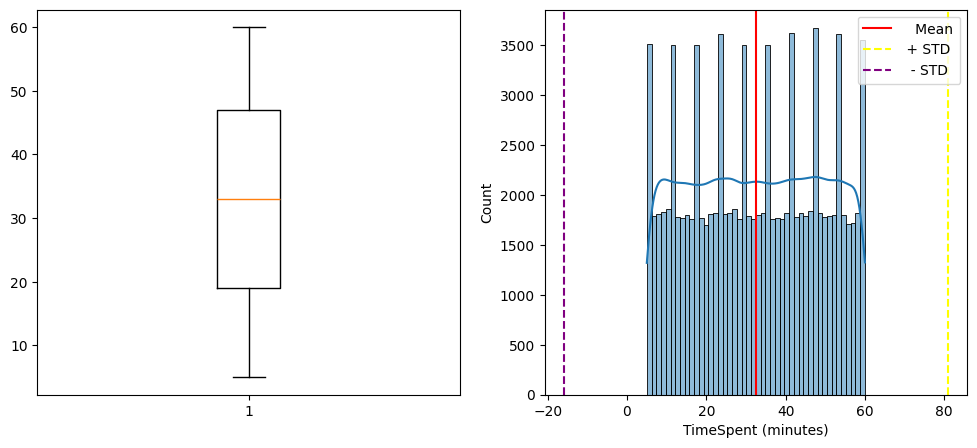

In [18]:
outlier(data,'TimeSpent (minutes)',1)

,Gender,LeadSource,TimeSpent (minutes),PagesViewed,LeadStatus,EmailSent,DeviceType,ReferralSource,FormSubmissions,ResponseTime (hours),FollowUpEmails,PaymentHistory,Conversion (Target)


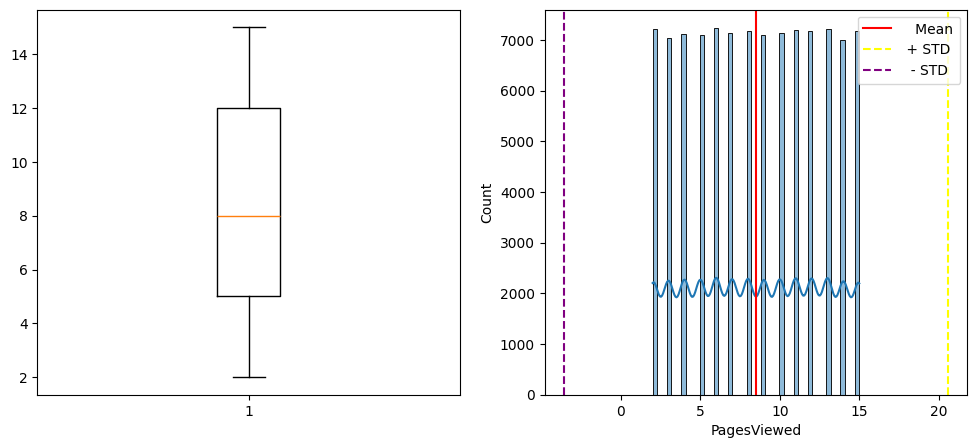

In [19]:
outlier(data,'PagesViewed')

,Gender,LeadSource,TimeSpent (minutes),PagesViewed,LeadStatus,EmailSent,DeviceType,ReferralSource,FormSubmissions,ResponseTime (hours),FollowUpEmails,PaymentHistory,Conversion (Target)


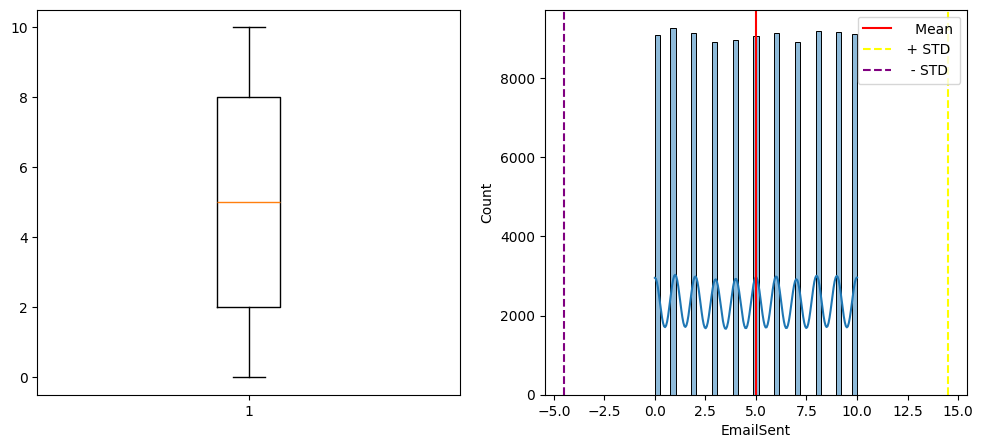

In [20]:
outlier(data,'EmailSent')

,Gender,LeadSource,TimeSpent (minutes),PagesViewed,LeadStatus,EmailSent,DeviceType,ReferralSource,FormSubmissions,ResponseTime (hours),FollowUpEmails,PaymentHistory,Conversion (Target)


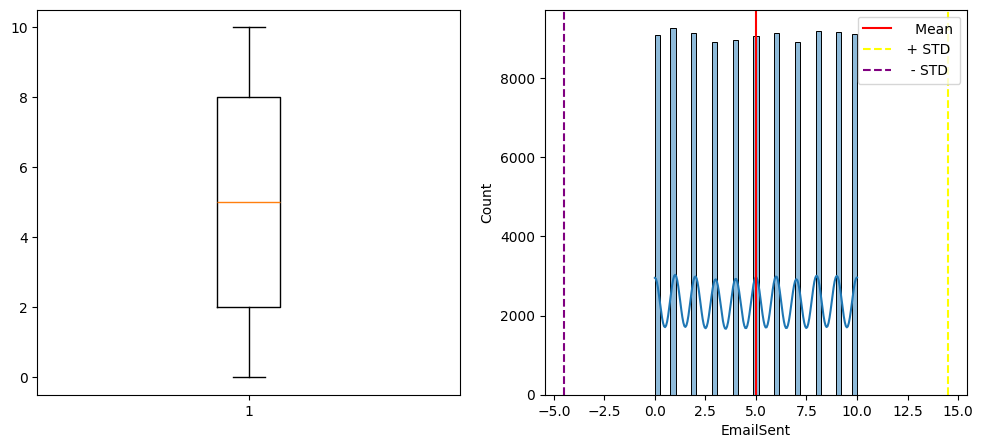

In [21]:
outlier(data,'EmailSent')

,Gender,LeadSource,TimeSpent (minutes),PagesViewed,LeadStatus,EmailSent,DeviceType,ReferralSource,FormSubmissions,ResponseTime (hours),FollowUpEmails,PaymentHistory,Conversion (Target)


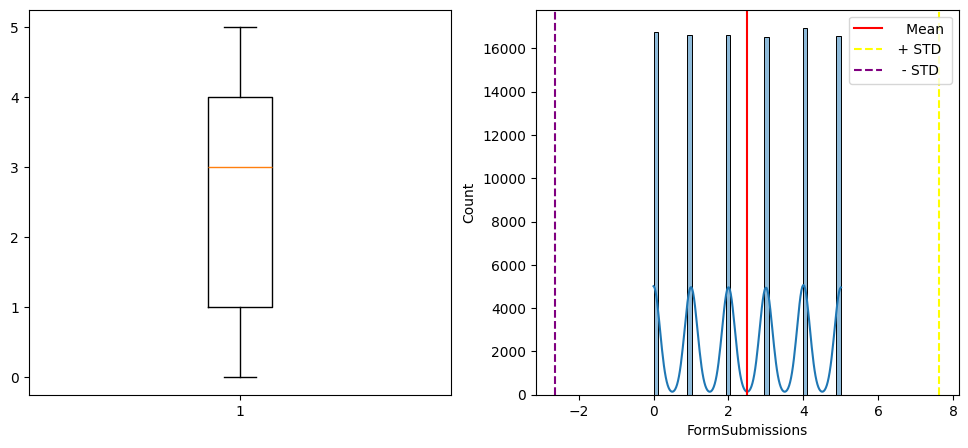

In [22]:
outlier(data,'FormSubmissions')

,Gender,LeadSource,TimeSpent (minutes),PagesViewed,LeadStatus,EmailSent,DeviceType,ReferralSource,FormSubmissions,ResponseTime (hours),FollowUpEmails,PaymentHistory,Conversion (Target)


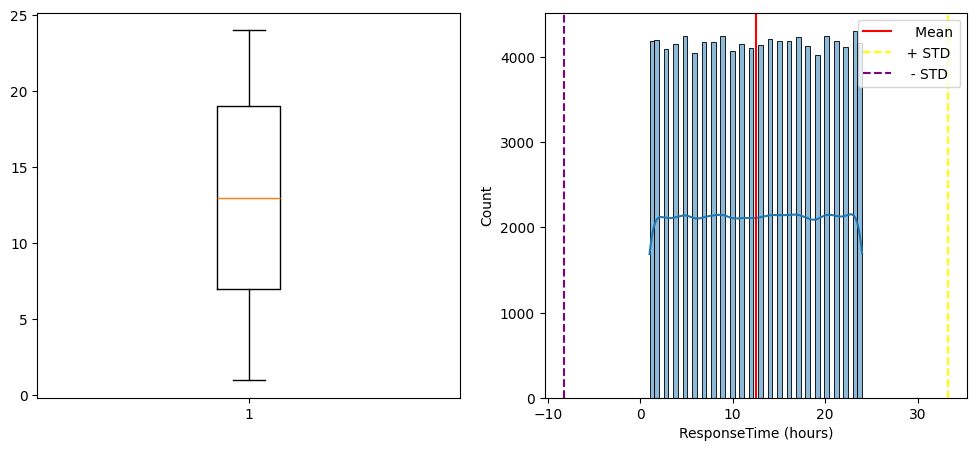

In [23]:
outlier(data,'ResponseTime (hours)')

,Gender,LeadSource,TimeSpent (minutes),PagesViewed,LeadStatus,EmailSent,DeviceType,ReferralSource,FormSubmissions,ResponseTime (hours),FollowUpEmails,PaymentHistory,Conversion (Target)


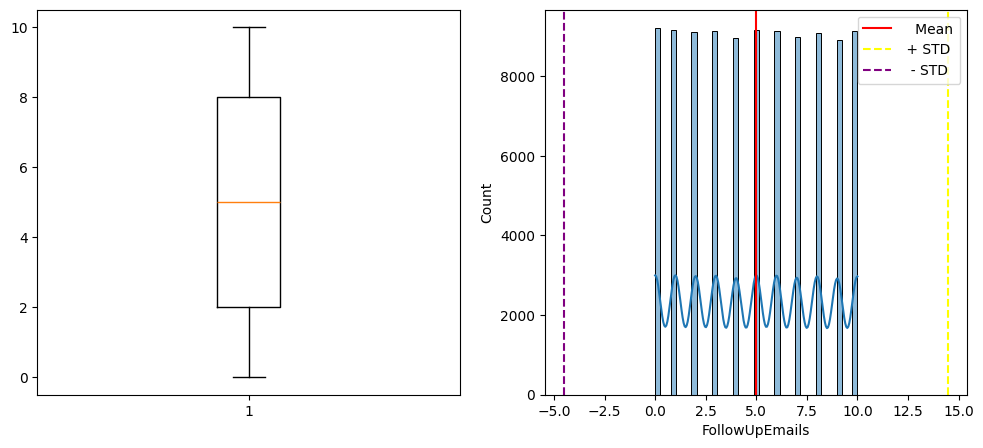

In [24]:
outlier(data,'FollowUpEmails')

In [25]:
data.head()

,Gender,LeadSource,TimeSpent (minutes),PagesViewed,LeadStatus,EmailSent,DeviceType,ReferralSource,FormSubmissions,ResponseTime (hours),FollowUpEmails,PaymentHistory,Conversion (Target)
0,Female,Referral,30,13,Warm,1,Desktop,Google,4,7,10,No Payment,0
1,Female,Referral,28,4,Hot,7,Desktop,Direct,2,13,3,No Payment,0
2,Female,Referral,45,10,Warm,9,Tablet,Direct,4,10,8,No Payment,0
3,Female,Email,45,15,Warm,5,Desktop,ReferralSite,1,11,1,Good,0
4,Male,Referral,31,11,Cold,2,Tablet,Google,4,9,2,No Payment,0


## data Encoding

In [26]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Gender']=le.fit_transform(data['Gender'])

In [27]:
data=pd.get_dummies(data,columns=['LeadSource','LeadStatus','DeviceType','ReferralSource','PaymentHistory'],dtype='int')

## Feature & Target Split

In [28]:
x=data.drop('Conversion (Target)',axis=1)
y=data['Conversion (Target)']

In [29]:
x.shape

(100000, 24)

## Handle imbalance lebel

In [30]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()
x,y=smt.fit_resample(x,y)

C:\Users\Dell\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


## Train–Test Split

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [32]:
y_test[y_test==0].head()

54736    0
33959    0
9232     0
80411    0
37819    0
Name: Conversion (Target), dtype: int64

In [33]:
x_train.iloc[33959 ]

Gender                          1
TimeSpent (minutes)            59
PagesViewed                    11
EmailSent                       9
FormSubmissions                 2
ResponseTime (hours)           21
FollowUpEmails                  5
LeadSource_Email                1
LeadSource_Organic              0
LeadSource_Referral             0
LeadSource_Social Media         0
LeadStatus_Cold                 0
LeadStatus_Hot                  0
LeadStatus_Warm                 1
DeviceType_Desktop              1
DeviceType_Mobile               0
DeviceType_Tablet               0
ReferralSource_Direct           0
ReferralSource_Facebook         0
ReferralSource_Google           1
ReferralSource_ReferralSite     0
ReferralSource_Twitter          0
PaymentHistory_Good             1
PaymentHistory_No Payment       0
Name: 78023, dtype: int64

In [34]:
y_test[y_test==1].head()

101192    1
159497    1
172847    1
177698    1
133956    1
Name: Conversion (Target), dtype: int64

In [35]:
x_train.iloc[101192]

Gender                          0
TimeSpent (minutes)            55
PagesViewed                    13
EmailSent                       8
FormSubmissions                 2
ResponseTime (hours)            2
FollowUpEmails                  9
LeadSource_Email                1
LeadSource_Organic              0
LeadSource_Referral             0
LeadSource_Social Media         0
LeadStatus_Cold                 0
LeadStatus_Hot                  0
LeadStatus_Warm                 1
DeviceType_Desktop              1
DeviceType_Mobile               0
DeviceType_Tablet               0
ReferralSource_Direct           0
ReferralSource_Facebook         0
ReferralSource_Google           0
ReferralSource_ReferralSite     0
ReferralSource_Twitter          0
PaymentHistory_Good             0
PaymentHistory_No Payment       1
Name: 162576, dtype: int64

## Feature Scaling

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train_scaler = scaler.fit_transform(x_train)
x_test_scaler = scaler.transform(x_test)

x_train_scaller=pd.DataFrame(x_train_scaler,columns=x_train.columns)
x_test_scaller=pd.DataFrame(x_test_scaler,columns=x_test.columns)


In [37]:

y_train.value_counts()

Conversion (Target)
0    78767
1    78597
Name: count, dtype: int64

## all model training 

## KNN

In [38]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3,metric='cosine')

In [39]:
knn.fit(x_train_scaller,y_train)

KNeighborsClassifier(metric='cosine', n_neighbors=3)

In [104]:
train_pred=knn.predict(x_train_scaller)


In [105]:
accuracy_score(y_train,train_pred)

0.9923870770951425

In [42]:
test_pred=knn.predict(x_test_scaller)


In [43]:
accuracy_score(y_test,test_pred)

0.9907478013319099

In [44]:
confusion_matrix(y_test,test_pred)

array([[19529,    57],
       [  307, 19449]])

In [45]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     19586
           1       1.00      0.98      0.99     19756

    accuracy                           0.99     39342
   macro avg       0.99      0.99      0.99     39342
weighted avg       0.99      0.99      0.99     39342



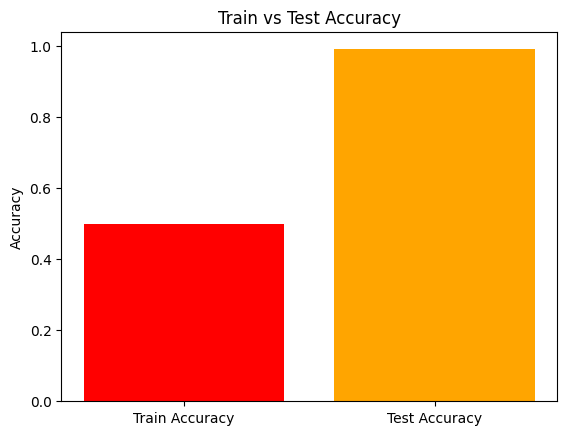

In [46]:
train_acc=accuracy_score(y_train,train_pred)
test_acc = accuracy_score(y_test, test_pred)
plt.bar(["Train Accuracy", "Test Accuracy"], [train_acc, test_acc],color=["red", "orange"] )
plt.ylabel("Accuracy")
plt.title("Train vs Test Accuracy")
plt.show()

## LogisticRegression

In [47]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

C:\Users\Dell\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [48]:
train_pred=lr.predict(x_train)

In [49]:
accuracy_score(y_train,train_pred)

0.9815904527083704

In [50]:
confusion_matrix(y_train,train_pred)

array([[78153,   614],
       [ 2283, 76314]])

In [51]:
print(classification_report(y_train,train_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     78767
           1       0.99      0.97      0.98     78597

    accuracy                           0.98    157364
   macro avg       0.98      0.98      0.98    157364
weighted avg       0.98      0.98      0.98    157364



In [52]:
test_pred=lr.predict(x_test)


In [53]:
accuracy_score(y_test,test_pred)

0.9816735295612831

In [54]:
confusion_matrix(y_test,test_pred)

array([[19431,   155],
       [  566, 19190]])

In [55]:

print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     19586
           1       0.99      0.97      0.98     19756

    accuracy                           0.98     39342
   macro avg       0.98      0.98      0.98     39342
weighted avg       0.98      0.98      0.98     39342



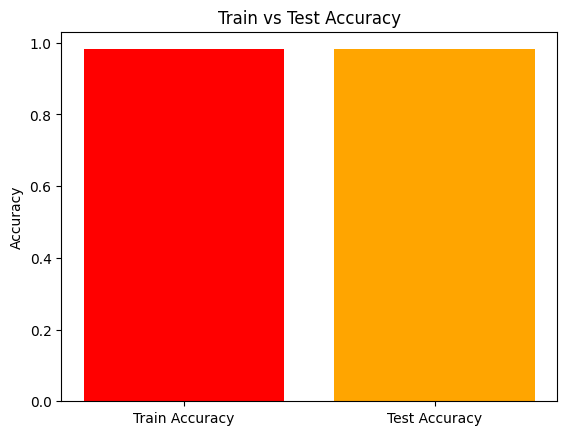

In [56]:
train_acc=accuracy_score(y_train,train_pred)
test_acc = accuracy_score(y_test, test_pred)
plt.bar(["Train Accuracy", "Test Accuracy"], [train_acc, test_acc],color=["red", "orange"] )
plt.ylabel("Accuracy")
plt.title("Train vs Test Accuracy")
plt.show()

## DecisionTree

In [57]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [58]:
train_pred=dt.predict(x_train)
accuracy_score(y_train,train_pred)

1.0

In [59]:
confusion_matrix(y_train,train_pred)

array([[78767,     0],
       [    0, 78597]])

In [60]:
print(classification_report(y_train,train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     78767
           1       1.00      1.00      1.00     78597

    accuracy                           1.00    157364
   macro avg       1.00      1.00      1.00    157364
weighted avg       1.00      1.00      1.00    157364



In [61]:
test_pred=dt.predict(x_test)
accuracy_score(y_test,test_pred)

0.9841390879975599

In [62]:
confusion_matrix(y_test,test_pred)

array([[19220,   366],
       [  258, 19498]])

In [63]:

print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98     19586
           1       0.98      0.99      0.98     19756

    accuracy                           0.98     39342
   macro avg       0.98      0.98      0.98     39342
weighted avg       0.98      0.98      0.98     39342



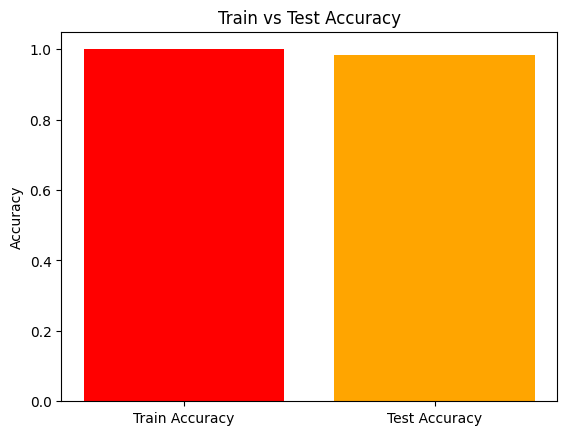

In [64]:
train_acc=accuracy_score(y_train,train_pred)
test_acc = accuracy_score(y_test, test_pred)
plt.bar(["Train Accuracy", "Test Accuracy"], [train_acc, test_acc],color=["red", "orange"] )
plt.ylabel("Accuracy")
plt.title("Train vs Test Accuracy")
plt.show()

## Random Forest

In [65]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [66]:
train_pred=rf.predict(x_train)
accuracy_score(y_train,train_pred)

1.0

In [67]:
confusion_matrix(y_train,train_pred)

array([[78767,     0],
       [    0, 78597]])

In [68]:

print(classification_report(y_train,train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     78767
           1       1.00      1.00      1.00     78597

    accuracy                           1.00    157364
   macro avg       1.00      1.00      1.00    157364
weighted avg       1.00      1.00      1.00    157364



In [69]:
test_pred=rf.predict(x_test)
accuracy_score(y_test,test_pred)

0.9920187077423619

In [70]:
confusion_matrix(y_test,test_pred)

array([[19578,     8],
       [  306, 19450]])

In [71]:

print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     19586
           1       1.00      0.98      0.99     19756

    accuracy                           0.99     39342
   macro avg       0.99      0.99      0.99     39342
weighted avg       0.99      0.99      0.99     39342



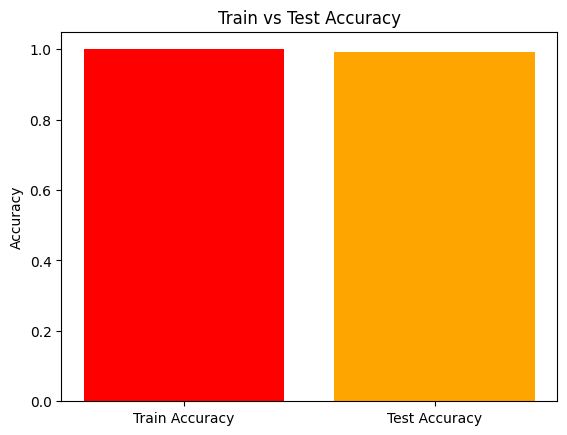

In [72]:
train_acc=accuracy_score(y_train,train_pred)
test_acc = accuracy_score(y_test, test_pred)
plt.bar(["Train Accuracy", "Test Accuracy"], [train_acc, test_acc],color=["red", "orange"] )
plt.ylabel("Accuracy")
plt.title("Train vs Test Accuracy")
plt.show()

## xgboost

In [73]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [74]:
train_pred=xgb.predict(x_train)
accuracy_score(y_train,train_pred)

0.9947764418799725

In [75]:
confusion_matrix(y_train,train_pred)

array([[78753,    14],
       [  808, 77789]])

In [76]:

print(classification_report(y_train,train_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     78767
           1       1.00      0.99      0.99     78597

    accuracy                           0.99    157364
   macro avg       0.99      0.99      0.99    157364
weighted avg       0.99      0.99      0.99    157364



In [77]:
test_pred=xgb.predict(x_test)
accuracy_score(y_test,test_pred)

0.9908494738447461

In [78]:
confusion_matrix(y_test,test_pred)

array([[19529,    57],
       [  303, 19453]])

In [79]:

print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     19586
           1       1.00      0.98      0.99     19756

    accuracy                           0.99     39342
   macro avg       0.99      0.99      0.99     39342
weighted avg       0.99      0.99      0.99     39342



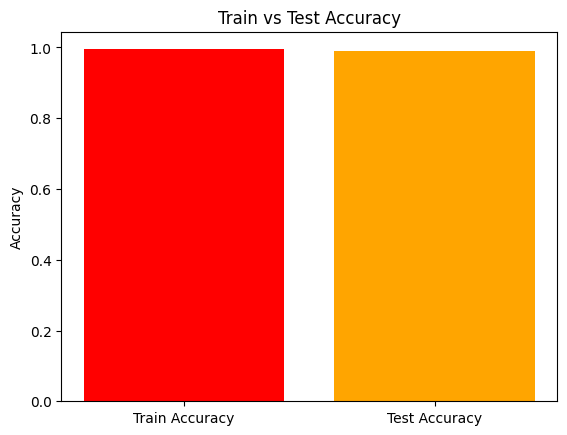

In [80]:
train_acc=accuracy_score(y_train,train_pred)
test_acc = accuracy_score(y_test, test_pred)
plt.bar(["Train Accuracy", "Test Accuracy"], [train_acc, test_acc],color=["red", "orange"] )
plt.ylabel("Accuracy")
plt.title("Train vs Test Accuracy")
plt.show()

## svm support vector machine 

In [81]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(x_train_scaller,y_train)

SVC()

In [82]:
train_pred=svm.predict(x_train)
accuracy_score(y_train,train_pred)

0.5005401489540174

In [83]:
confusion_matrix(y_train,train_pred)

array([[78767,     0],
       [78597,     0]])

In [84]:

print(classification_report(y_train,train_pred))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67     78767
           1       0.00      0.00      0.00     78597

    accuracy                           0.50    157364
   macro avg       0.25      0.50      0.33    157364
weighted avg       0.25      0.50      0.33    157364



C:\Users\Dell\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Dell\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Dell\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [85]:
test_pred=svm.predict(x_test_scaller)
accuracy_score(y_test,test_pred)

0.9897310762035484

In [86]:
confusion_matrix(y_test,test_pred)

array([[19578,     8],
       [  396, 19360]])

In [87]:

print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     19586
           1       1.00      0.98      0.99     19756

    accuracy                           0.99     39342
   macro avg       0.99      0.99      0.99     39342
weighted avg       0.99      0.99      0.99     39342



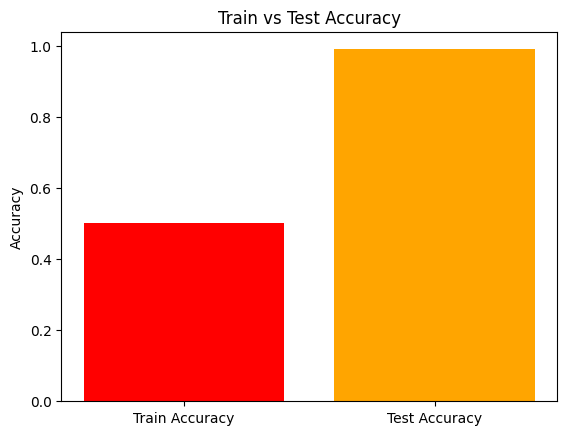

In [88]:
train_acc=accuracy_score(y_train,train_pred)
test_acc = accuracy_score(y_test, test_pred)
plt.bar(["Train Accuracy", "Test Accuracy"], [train_acc, test_acc],color=["red", "orange"] )
plt.ylabel("Accuracy")
plt.title("Train vs Test Accuracy")
plt.show()

In [89]:
x_train.head(1)

,Gender,TimeSpent (minutes),PagesViewed,EmailSent,FormSubmissions,ResponseTime (hours),FollowUpEmails,LeadSource_Email,LeadSource_Organic,LeadSource_Referral,...,DeviceType_Desktop,DeviceType_Mobile,DeviceType_Tablet,ReferralSource_Direct,ReferralSource_Facebook,ReferralSource_Google,ReferralSource_ReferralSite,ReferralSource_Twitter,PaymentHistory_Good,PaymentHistory_No Payment
195112,0,24,13,7,3,7,5,0,1,0,...,0,0,0,0,0,0,0,0,0,0


## Deploy model using ## Deploy model usingXgboost

In [90]:
x_train.columns

Index(['Gender', 'TimeSpent (minutes)', 'PagesViewed', 'EmailSent',
       'FormSubmissions', 'ResponseTime (hours)', 'FollowUpEmails',
       'LeadSource_Email', 'LeadSource_Organic', 'LeadSource_Referral',
       'LeadSource_Social Media', 'LeadStatus_Cold', 'LeadStatus_Hot',
       'LeadStatus_Warm', 'DeviceType_Desktop', 'DeviceType_Mobile',
       'DeviceType_Tablet', 'ReferralSource_Direct', 'ReferralSource_Facebook',
       'ReferralSource_Google', 'ReferralSource_ReferralSite',
       'ReferralSource_Twitter', 'PaymentHistory_Good',
       'PaymentHistory_No Payment'],
      dtype='object')

In [91]:
Gender=0
TimeSpent_minutes=45
PagesViewed=80
EmailSent=10
FormSubmissions=8
ResponseTime_hours=24
FollowUpEmails=10

In [92]:
Gender=0
TimeSpent_minutes=45
PagesViewed=12
EmailSent=7
FormSubmissions=4
ResponseTime_hours=24
FollowUpEmails=2

def LeadSource(clas):
    if clas=='Email':
        LeadSource_Email=1
        LeadSource_Organic=0
        LeadSource_Referral=0
        LeadSource_Social_Media=0
        
        
        
    elif clas=='Organic':
        LeadSource_Email=0
        LeadSource_Organic=1
        LeadSource_Referral=0
        LeadSource_Social_Media=0
        
        
    elif clas=='Referral':
        LeadSource_Email=0
        LeadSource_Organic=0
        LeadSource_Referral=1
        LeadSource_Social_Media=0
        
    elif clas=='Social Media':
        LeadSource_Email=0
        LeadSource_Organic=0
        LeadSource_Referral=0
        LeadSource_Social_Media=1
    return LeadSource_Email,LeadSource_Organic,LeadSource_Referral,LeadSource_Social_Media
clas='Social Media'
LeadSource_Email,LeadSource_Organic,LeadSource_Referral,LeadSource_Social_Media=LeadSource(clas)

In [93]:
def Leadstatus(clas):
    if clas=='Cold':
        LeadStatus_Cold=1
        LeadStatus_Hot=0
        LeadStatus_Warm=0
    elif clas=='Hot':
        LeadStatus_Cold=0
        LeadStatus_Hot=1
        LeadStatus_Warm=0
    elif clas=='Warm':
        LeadStatus_Cold=0
        LeadStatus_Hot=0
        LeadStatus_Warm=1
    return LeadStatus_Cold,LeadStatus_Hot,LeadStatus_Warm
clas='Cold'
LeadStatus_Cold,LeadStatus_Hot,LeadStatus_Warm=Leadstatus(clas) 
        


In [94]:
def deviceType(clas):
    if clas=='Desktop':
      DeviceType_Desktop=1
      DeviceType_Mobile=0
      DeviceType_Tablet=0

    elif clas=='Mobile':
      DeviceType_Desktop=0
      DeviceType_Mobile=1
      DeviceType_Tablet=0
    elif clas=='Tablet':
      DeviceType_Desktop=0
      DeviceType_Mobile=0
      DeviceType_Tablet=1
    return DeviceType_Desktop,DeviceType_Mobile,DeviceType_Tablet

clas='Mobile'
DeviceType_Desktop,DeviceType_Mobile,DeviceType_Tablet=deviceType(clas)

In [95]:
def ReferralSource(clas):
    if clas=='Direct':
       ReferralSource_Direct=1
       ReferralSource_Facebook=0
       ReferralSource_Google=0
       ReferralSource_ReferralSite=0
       ReferralSource_Twitter=0

    elif clas=='Facebook':
       ReferralSource_Direct=0
       ReferralSource_Facebook=1
       ReferralSource_Google=0
       ReferralSource_ReferralSite=0
       ReferralSource_Twitter=0

    elif clas=='Google':
       ReferralSource_Direct=0
       ReferralSource_Facebook=0
       ReferralSource_Google=1
       ReferralSource_ReferralSite=0
       ReferralSource_Twitter=0
        
    elif clas=='ReferralSite':
       ReferralSource_Direct=0
       ReferralSource_Facebook=0
       ReferralSource_Google=0
       ReferralSource_ReferralSite=1
       ReferralSource_Twitter=0
        
    elif clas=='Twitter':
       ReferralSource_Direct=0
       ReferralSource_Facebook=0
       ReferralSource_Google=0
       ReferralSource_ReferralSite=0
       ReferralSource_Twitter=1

    return ReferralSource_Direct,ReferralSource_Facebook,ReferralSource_Google,ReferralSource_ReferralSite,ReferralSource_Twitter
clas='Google'
ReferralSource_Direct,ReferralSource_Facebook,ReferralSource_Google,ReferralSource_ReferralSite,ReferralSource_Twitter=ReferralSource(clas)
    

In [96]:
def PaymentHistory(clas):
    if clas=='Good':
       PaymentHistory_Good=1
       PaymentHistory_No_Payment=0
    elif clas=='No Payment':
       PaymentHistory_Good=0
       PaymentHistory_No_Payment=1

    return PaymentHistory_Good,PaymentHistory_No_Payment

clas='Good'

PaymentHistory_Good,PaymentHistory_No_Payment=PaymentHistory(clas)
        
    

In [97]:
x_train.columns

Index(['Gender', 'TimeSpent (minutes)', 'PagesViewed', 'EmailSent',
       'FormSubmissions', 'ResponseTime (hours)', 'FollowUpEmails',
       'LeadSource_Email', 'LeadSource_Organic', 'LeadSource_Referral',
       'LeadSource_Social Media', 'LeadStatus_Cold', 'LeadStatus_Hot',
       'LeadStatus_Warm', 'DeviceType_Desktop', 'DeviceType_Mobile',
       'DeviceType_Tablet', 'ReferralSource_Direct', 'ReferralSource_Facebook',
       'ReferralSource_Google', 'ReferralSource_ReferralSite',
       'ReferralSource_Twitter', 'PaymentHistory_Good',
       'PaymentHistory_No Payment'],
      dtype='object')

In [98]:
final=[[Gender,TimeSpent_minutes,PagesViewed,EmailSent,FormSubmissions,ResponseTime_hours,FollowUpEmails,LeadSource_Email,LeadSource_Organic,LeadSource_Referral,LeadSource_Social_Media,LeadStatus_Cold,LeadStatus_Hot,LeadStatus_Warm,DeviceType_Desktop,DeviceType_Mobile,DeviceType_Tablet,ReferralSource_Direct,ReferralSource_Facebook,ReferralSource_Google,ReferralSource_ReferralSite,ReferralSource_Twitter,PaymentHistory_Good,PaymentHistory_No_Payment]]

In [99]:
pre=xgb.predict(final)

In [100]:
value=int(pre[0])

In [101]:
value = int(pre[0])

In [102]:
value

0

In [103]:
import pickle 
pickle.dump(xgb,open('customer_conversion.pkl','wb'))